In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Automobile_data.csv")

# Replace "?" with NaN
df.replace("?", pd.NA, inplace=True)

# Convert numeric-looking columns to proper numeric types
cols_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check missing values
missing_counts = df.isna().sum()
print("Missing values per column:\n")
print(missing_counts[missing_counts > 0])


Missing values per column:

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [2]:
# Drop rows with missing target variable 'price'
df.dropna(subset=['price'], inplace=True)

# Fill missing numeric columns with median
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill missing with mode
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


<ipython-input-2-8f55482334d0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-2-8f55482334d0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

        symboling  normalized-losses  wheel-base      length       width  \
count  201.000000         201.000000  201.000000  201.000000  201.000000   
mean     0.840796         120.711443   98.797015  174.200995   65.889055   
std      1.254802          32.111623    6.066366   12.322175    2.101471   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.800000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         137.000000  102.400000  183.500000   66.600000   
max      3.000000         256.000000  120.900000  208.100000   72.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  201.000000   
mean    53.766667  2555.666667   126.875622    3.330299    3.257562   
std      2.447822   517.296727    41.546834    0.268088    0.316082   
min     47.800000  1488.000000 

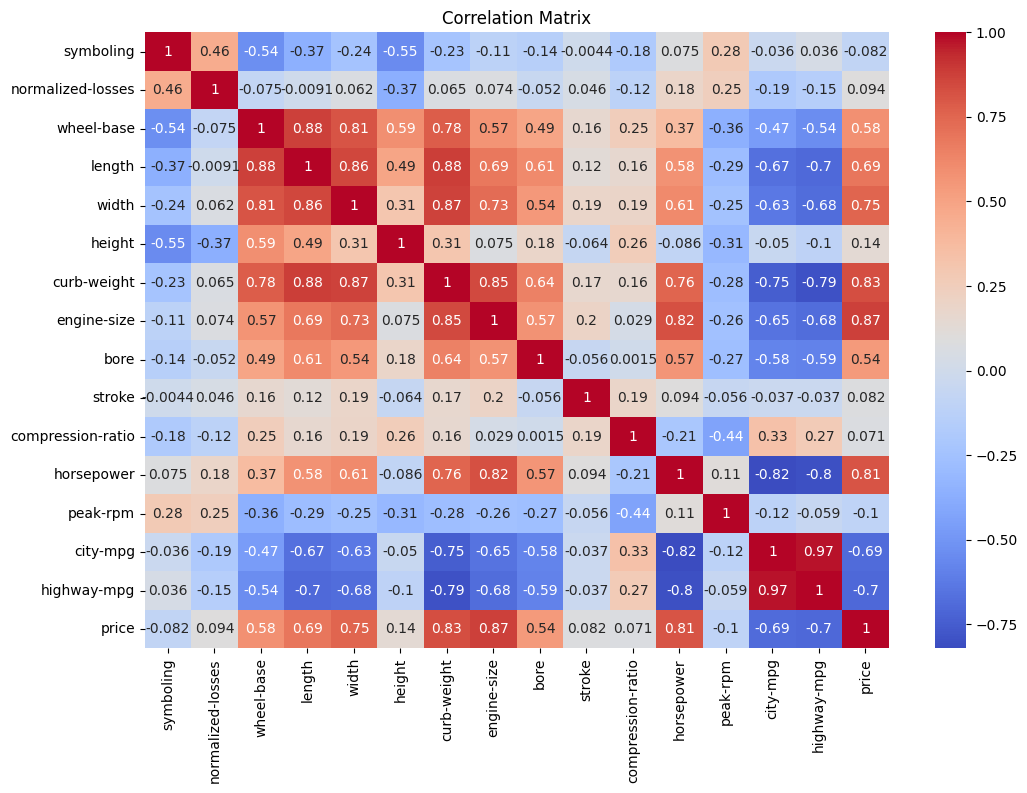

In [3]:
# Summary statistics
print(df.describe())

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


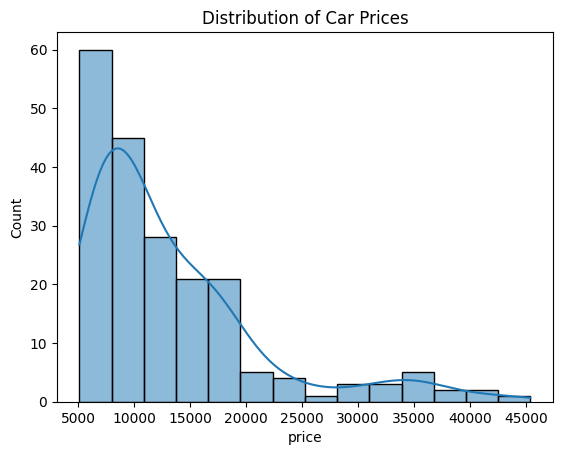

In [5]:
# Distribution of price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()


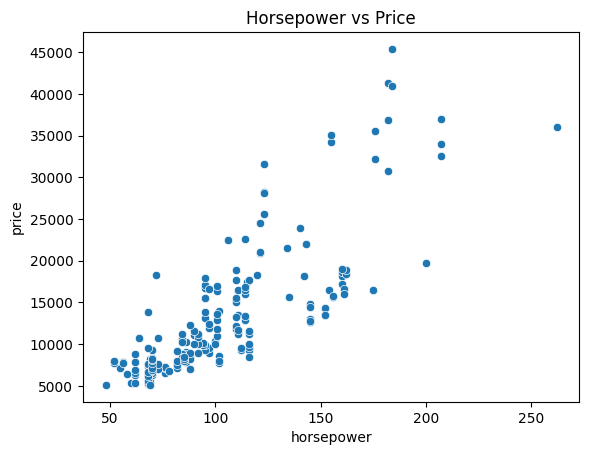

In [6]:
# Horsepower vs Price
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Horsepower vs Price')
plt.show()

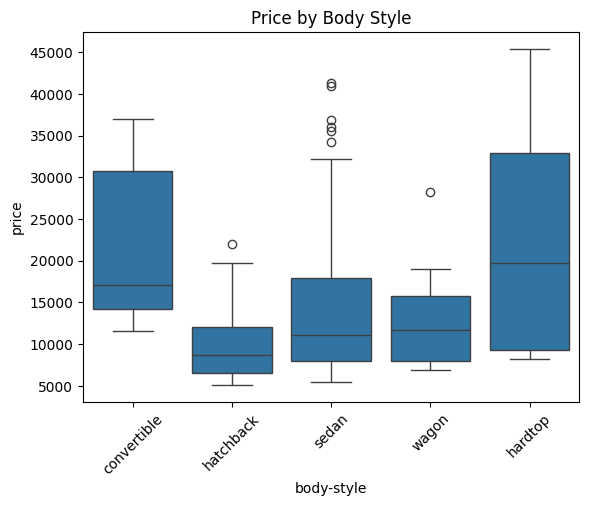

In [7]:
# Boxplot of Price by Body Style
sns.boxplot(x='body-style', y='price', data=df)
plt.title('Price by Body Style')
plt.xticks(rotation=45)
plt.show()